## LeetCode

### 回文数

In [108]:
def isPalindrome(x: int) -> bool:
    x = list(str(x))
    isPal = True
    while len(x)>1 and isPal:
        if x.pop()!=x.pop(0):
            return False
    return isPal

In [110]:
isPalindrome(12321)

True

In [107]:
list(str(1234)).pop(0)

'1'

### 罗马数字转换

In [123]:
class Solution:
    def __init__(self):
        self.rodict = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000}
    def romanToInt(self, s: str) -> int:
        # 从右至左，从个位数开始
        roman = list(s)
        intval = 0
        last_add = 0
        while len(roman)>0:
            temp = roman.pop()
            # 先看是否特殊情况（根据特殊情况的左部分检查），再加起来
            if temp in self.rodict:
                add_val =self.rodict[temp]
                if (add_val == 1 and (last_add ==5 or last_add ==10)) or add_val == 10 and (last_add ==50 or last_add ==100) or  (add_val == 100 and (last_add ==500 or last_add ==1000)):
                    intval -= add_val
                else:
                    # 若均不是则正常加起来
                    intval += add_val
                    last_add = add_val
        return intval

In [122]:
sol = Solution()
sol.romanToInt('CDXIV')

414

别人的答案
+ 第一个优点是发现只要比这个小，就减一
+ 第二是很清晰，从左到右进行，i<len-1是怕index超出

In [124]:
class Solution:
    def romanToInt(self, s):
        """
        :type s: str
        :rtype: int
        """
        a = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}        
        ans=0        
        for i in range(len(s)):            
            if i<len(s)-1 and a[s[i]]<a[s[i+1]]:                
                ans-=a[s[i]]
            else:
                ans+=a[s[i]]
        return ans

### 最长公共前缀

若只有一个元素，则直接返回
这次还是一个数组切片的问题，`    while not foundlongest and pos<=min_len:`最后不能-1，因为数组切片已经忽略最后一个元素了

In [41]:
def longestCommonPrefix(strs):
    pos = 1
    prefix = ''
    foundlongest = False
    if len(strs) ==1:
        return strs[0]
    min_len = min([len(i) for i in strs])
    while not foundlongest and pos<=min_len:
        for i in range(len(strs)):
            # 若前后两个值不等，则退出循环，并设置为True
            if i!=len(strs)-1:
                print(strs[i][:pos],strs[i+1][:pos])
            if i!=len(strs)-1 and strs[i][:pos]!=strs[i+1][:pos]:
                foundlongest = True
                break
        # 若循环结束均相等，则更新前缀，并pos+1
        if not foundlongest:
            prefix = strs[0][:pos]
            pos+=1
    return prefix

In [42]:
longestCommonPrefix(strs =["ab", "a"])

a a


'a'

网友答案：利用python的zip函数，把str看成list然后把输入看成二维数组，左对齐纵向压缩，然后把每项利用集合去重，之后遍历list中找到元素长度大于1之前的就是公共前缀

In [5]:
list(zip("ab", "a",'abc','da'))

[('a', 'a', 'a', 'd')]

In [8]:
list(zip(*['ab','cd','abc','da']))

[('a', 'c', 'a', 'd'), ('b', 'd', 'b', 'a')]

In [55]:
list(map(set, zip(*["ab", "a",'abc','ada'])))

[{'a'}]

In [12]:
def longestCommonPrefix(strs):
    if not strs: return ""
    ss = list(map(set, zip(*strs)))
    res = ""
    for x in ss:
        x = list(x)
        if len(x) > 1:
            break
        res = res + x[0]
    return res

In [14]:
longestCommonPrefix(["adb", "ad",'adbc','ada'])

'ad'

### 有效的括号

In [100]:
def isValid(s: str) -> bool:
    valid = True
    alist = []
    fuhao = {'(':')','{':'}','[':']',}
    for i in s:
        if i in fuhao.keys():
            alist.append(i)
            print(alist)
        elif i in fuhao.values():
            if alist == [] or fuhao[alist.pop()]!=i:
                valid = False
                break
            # 若alist还有值，则失败
    if alist!=[]:
        valid = False
    return valid

In [102]:
isValid("(")

['(']


False

### 搜索插入位置

In [108]:
a=[1,2,3,4,5]
def seq_search(list_search,target):
    index = 0
    found = False
    first = 0
    # 这里为什么要-1？？？
    # 防止index溢出，有可能取到len值
    last = len(list_search)-1
    while not found:
        # 是last+first，不是减号！！
        # round因为是0.5所以可用，但是最好用//
        temp_pos = round((last+first)/2)
        if list_search[temp_pos] == target:
            index = temp_pos
            return index
        elif list_search[temp_pos] > target:
            # 我所没做到的就在这个+1上
            last = temp_pos-1
        else:
            first = temp_pos+1
        if first>last:
            if list_search[temp_pos] > target:
                index= temp_pos
            else:
                index= temp_pos+1
            return index
        print(temp_pos,first,last)
    return index

In [111]:
seq_search(a,0)

2 0 1


0

### 两数相加  ——出现问题，通过不了

In [13]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def hasnext():
        if self.next!=None:
            return True
        else:
            return False

def addTwoNumbers(l1: ListNode, l2: ListNode) -> ListNode:
    add_val = 0
    base = 1
    while l1!=None and l2!=None:
        add_val = add_val+base*(l1.val+l2.val)
        l1,l2=[l1.next,l2.next]
        base*=10
    while l1!=None:
        l1 = l1.next
        add_val = add_val+l1.val
        base*=10
    while l2!=None:
        l2 = l2.next
        add_val = add_val+l2.val
        base*=10
    # 转化为字符串并反转
    str_val = str(add_val)[::-1]
    ini_node = ListNode()
    tempnode = ini_node
    # 创建新的Node
    for i in range(len(str_val)):
        tempnode.next = ListNode(int(str_val[i]))
        tempnode = tempnode.next
    return ini_node

In [16]:
l1 = ListNode(2,ListNode(4,ListNode(3)))
l2 = ListNode(5,ListNode(6,ListNode(4)))
addTwoNumbers(l1,l2).next.next.val

0

### 3. 无重复字符的最长子串

首先判断有无重复字符

In [19]:
a = 'ab'
def no_dup(s):
    if len(set(a))!=len(a):
        return False
    else:
        return True
no_dup(a)

True

In [21]:
list(range(1))

[0]

此方法字符串不能过长，否则出现问题

In [56]:
def lengthOfLongestSubstring(s: str) -> int:
#     if len(s)<=1:
#         return len(s)
    # 判断有无重复字符
    def no_dup(st):
        if len(set(st))!=len(st):
            return False
        else:
            return True
    found = False
    len_slice = len(s)
    while not found:
        for i in range(len(s)-len_slice+1):
#             print(s[i:i+len_slice])
            if no_dup(s[i:i+len_slice]):
                return len_slice
        len_slice-=1
lengthOfLongestSubstring(' a')

2

网友方法
+ 解决我的困惑点是，在遇到重复后，切片刀之前重复点+1的地方，这样保留了之前不重复的长度

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        a = []
        res = 0
        for i in s:
            if i in a:
                a = a[a.index(i)+1:]
            a.append(i)
            res = res if len(a) < res else len(a)
        return res

In [60]:
list('sssa').pop()

'a'

In [65]:
def is_sym(s):
    ls = list(s)
    while len(ls)>1:
        if ls.pop(0)!=ls.pop():
            return False
    return True
is_sym('abba')

True

In [ ]:
    def longestPalindrome(self, s: str) -> str:
        def is_sym(s):
            ls = list(s)
            while len(ls)>1:
                if ls.pop(0)!=ls.pop():
                    return False
            return True
        found = False
        len_slice = len(s)
        while not found:
            for i in range(len(s)-len_slice+1):
                if is_sym(s[i:i+len_slice]):
                    return s[i:i+len_slice]
            len_slice-=1

### 26. 删除有序数组中的重复项

In [5]:
def removeDuplicates(nums) -> int:
    del_nums = 0
    for i in range(len(nums)-1):
        if nums[i]==nums[i+1]:
            # 若相等，则把i换到前面delnum个的位置，最后删除
            nums.insert(del_nums,nums.pop(i))
            del_nums+=1
    nums = nums[del_nums:]
    print(nums)
    return len(nums)
removeDuplicates([1,1,2,2,4,4,5])

[1, 2, 4, 5]


4

### 27. 移除元素

In [ ]:
class Solution:def removeElement(self, nums: List[int], val: int) -> int:
    pos = 0
    for i in range(len(nums)):
        if nums[i]!=val:
            nums[pos] = nums[i]
            pos+=1
    print(nums)
    return pos

### 35. 搜索插入位置

``` javascript
nums = [1,3,5,6], target = 7
var searchInsert = function(nums, target) {
    for(let i in nums){
    if(nums[i]>=target){
        return i
    }
}
    return nums.length
};
```

### 动态规划

#### 22. 括号生成

首先写一个栈检查器，然后遍历，若符合则存入该结构，在遍历之前首先检查结构中有无此类结构，若有则删除

In [6]:
def brace_checker(braces):
    num = 0
    for i in braces:
        if i == '(':
            num+=1
        else:
            if num !=0:
                num -=1
            else:
                return '错误'
    if num !=0:
        return '错误'
    return '正确'

In [11]:
brace_checker('()())')

'错误'

从左边添加(，左边的括号一定是(，因此剩下的n-1可以看做p+q=n-1，即'( + p + ) + q'

因此遍历p即可

In [16]:
n=4

total_l = []
total_l.append([None])    # 0组括号时记为None
total_l.append(["()"])    # 1组括号只有一种情况

for i in range(2,n+1):
    # 当前数量的可用括号
    cur_list = []
     # 从0到n-1遍历所有可能的结构，p的个数是j，q的个数是n-1-j
    for j in range(i):  # 能取到i-1
        # 两个循环检查所有p和q
        for p in total_l[j]:
            for q in total_l[i-1-j]:
                if p == None:
                    p = ''
                if q == None:
                    q  = ''
                cur_list.append('('+p+')'+q)
    total_l.append(cur_list)
total_l

[[None],
 ['()'],
 ['()()', '(())'],
 ['()()()', '()(())', '(())()', '(()())', '((()))'],
 ['()()()()',
  '()()(())',
  '()(())()',
  '()(()())',
  '()((()))',
  '(())()()',
  '(())(())',
  '(()())()',
  '((()))()',
  '(()()())',
  '(()(()))',
  '((())())',
  '((()()))',
  '(((())))']]

In [ ]:
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        if n == 0:
            return []
        total_l = []
        total_l.append([None])    # 0组括号时记为None
        total_l.append(["()"])    # 1组括号只有一种情况
        for i in range(2,n+1):    # 开始计算i组括号时的括号组合
            l = []        
            for j in range(i):    # 开始遍历 p q ，其中p+q=i-1 , j 作为索引
                now_list1 = total_l[j]    # p = j 时的括号组合情况
                now_list2 = total_l[i-1-j]    # q = (i-1) - j 时的括号组合情况
                for k1 in now_list1:  
                    for k2 in now_list2:
                        if k1 == None:
                            k1 = ""
                        if k2 == None:
                            k2 = ""
                        el = "(" + k1 + ")" + k2
                        l.append(el)    # 把所有可能的情况添加到 l 中
            total_l.append(l)    # l这个list就是i组括号的所有情况，添加到total_l中，继续求解i=i+1的情况
        return total_l[n]

#### 最大递增子序列（不需要连续）

递归方式

In [44]:
nums = [1,5,2,21,4,32,231,12,21,2112]
memo = {}
# 返回nums数组中从i开始最大递增子序列
def max_incre(i,nums):
    if i in memo:
        return memo[i]
    max_len = 1
    # 若只有一个数，则返回1
    if i == len(nums)-1:
        memo[i]=1
        return 1
    for j in range(i,len(nums)):
        if nums[i]<nums[j]:
            max_len = max(max_len,1+max_incre(j,nums))
    memo[i]=max_len
    return max_len
max_incre(0,nums)

6

非递归方式（开销更小）
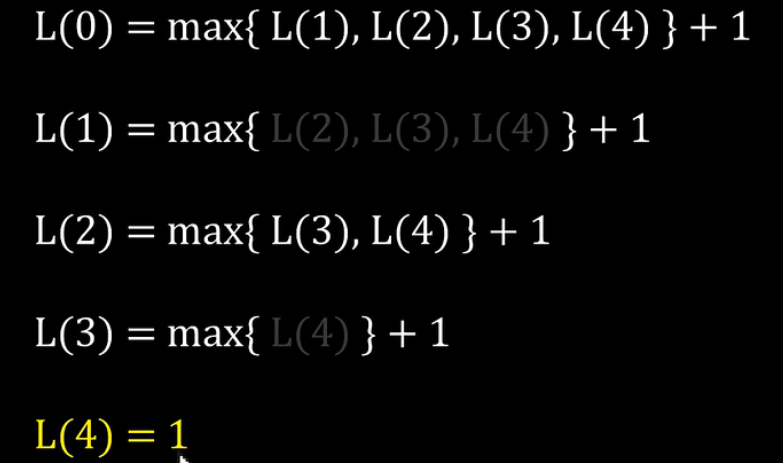

In [49]:
nums = [1,5,2,21,4,32,231,12,21,2112]
# 储存每个位置出发最大的递增子序列长度
L = [1]*len(nums)
# 返回nums数组中从i开始最大递增子序列
def max_incre(nums):
    # 从最右开始计算L(i)=max(L(i+2),L(i+3))+1
    for i in reversed(range(0,len(nums))):
        max_len = 1
        # 循环与之后的数进行对比
        for j in range(i+1,len(nums)):
            if nums[i]<nums[j]:
                max_len = max(max_len,L[j]+1)
        L[i] = max_len
    print(L)
max_incre(nums)

[6, 5, 5, 4, 4, 3, 2, 3, 2, 1]


#### 70. 爬楼梯
假设你正在爬楼梯。需要 n 阶你才能到达楼顶。
每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？

直觉思路：下一个阶段与当前阶段可分为1和n-1阶或2和n-2阶，录入之前的有效阶数，循环查找即可

In [21]:
def climb(n):
    mem = [0,1,1]  # 0层无，1层只有一种，2层有两种
    # 遍历mem数组3到n-1的下标
    for i in range(3,n+1):
        num = 0
        # 次数等于两种情况之和，即i-1和i-2时情况之和
        mem.append(mem[i-1]+mem[i-2])
    return mem
climb(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

#### 118. 杨辉三角
给定一个非负整数 numRows，生成「杨辉三角」的前 numRows 行。

在「杨辉三角」中，每个数是它左上方和右上方的数的和。

直觉思路：当前数组下标的数是上一个数组的下标数+下标数-1

In [19]:
def trian(n):
    mem = [[None],[1]]
    # 从第二行开始遍历
    for i in range(2,n+1):
        temp = []
        # 遍历这一行的中间元素
        for j in range(1,i-1):
            temp.append(mem[i-1][j]+mem[i-1][j-1])
        # 最后添加最左右两边的元素（也就是1）
        temp.append(1)
        temp.insert(0,1)
        mem.append(temp)
    return mem
trian(10)

[[None],
 [1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1]]

#### 1137. 第 N 个泰波那契数
泰波那契序列 Tn 定义如下： 

T0 = 0, T1 = 1, T2 = 1, 且在 n >= 0 的条件下 Tn+3 = Tn + Tn+1 + Tn+2

给你整数 n，请返回第 n 个泰波那契数 Tn 的值。


In [22]:
def taibo(n):
    mem = [0,1,1]  # 0层无，1层只有一种，2层有两种
    # 遍历mem数组3到n-1的下标
    for i in range(3,n+1):
        num = 0
        # 次数等于两种情况之和，即i-1和i-2时情况之和
        mem.append(mem[i-1]+mem[i-2]+mem[i-3])
    return mem
taibo(10)

[0, 1, 1, 2, 4, 7, 13, 24, 44, 81, 149]

#### 746. 使用最小花费爬楼梯
给你一个整数数组 cost ，其中 cost[i] 是从楼梯第 i 个台阶向上爬需要支付的费用。一旦你支付此费用，即可选择向上爬一个或者两个台阶。

你可以选择从下标为 0 或下标为 1 的台阶开始爬楼梯。

请你计算并返回达到楼梯顶部的最低花费。

直觉思路： 第n步时，只能选择从2+（n-2）和1+（n-1）里选择最小值并保存即可

In [28]:
def climb(cost):
    # 层数
    n = len(cost)
    mem = [0,0]   # 前两层不需要花钱
    # 遍历cost数组2到n-1的下标 
    for i in range(2,n+1):   # 这里n+1是因为要到顶部（最后一级台阶不算顶部）
        num = 0
        # 花费等于之前层跳到当前层花费+到之前层的花费
        mem.append(min(cost[i-1]+mem[i-1],cost[i-2]+mem[i-2]))
    return mem
climb([10,15,20])

[0, 0, 10, 15]

#### !!!53. 最大子数组和

网友答案解析：
+ pre的最大函数隐含了一个规则：若num[i]<=0，则另起炉灶选择num[i]
+ 另一个问题是，若之前的数组比当前的数大，但是这个数以及以后的数加起来更大，会怎样？
+ 表示以 nums[i] 结尾 的 连续 子数组的最大和
+ 解决问题的方法就是遍历所有数结尾的最大和，且在过程中保存最大值

In [2]:
nums = [-2,1,-3,1,-1,2,1,-5,4]
def maxSubArray(nums) -> int:
    size = len(nums)
    pre = 0
    res = nums[0]
    for i in range(size):
        print(f'nums[i]为{nums[i]}，pre为{pre}')
        pre = max(nums[i], pre + nums[i])
        print(f'结果为{pre}')
        res = max(res, pre)
    return res
maxSubArray( [2,1,-1,1,-1,3,1,-5,4])

nums[i]为2，pre为0
结果为2
nums[i]为1，pre为2
结果为3
nums[i]为-1，pre为3
结果为2
nums[i]为1，pre为2
结果为3
nums[i]为-1，pre为3
结果为2
nums[i]为3，pre为2
结果为5
nums[i]为1，pre为5
结果为6
nums[i]为-5，pre为6
结果为1
nums[i]为4，pre为1
结果为5


6

分治法
对于一个区间 [l,r][l,r]，我们可以维护四个量：

$\textit{lSum}$ 表示 [l,r] 内以 l为左端点的最大子段和 <br>
$\textit{rSum}$ 表示 [l,r] 内以 r 为右端点的最大子段和<br>
$\textit{mSum}$ 表示 [l,r]内的最大子段和<br>
$\textit{iSum}$ 表示 [l,r] 的区间和<br>


```javascript
function Status(l, r, m, i) {
    this.lSum = l;
    this.rSum = r;
    this.mSum = m;
    this.iSum = i;
}

const pushUp = (l, r) => {
    const iSum = l.iSum + r.iSum;      //区间和等于两个区间相加
    const lSum = Math.max(l.lSum, l.iSum + r.lSum);      //最大字段和因为是从左开始的，因此求最大即可
    const rSum = Math.max(r.rSum, r.iSum + l.rSum);
    //最大字段和要么是左，右，要么是左右中间（即左区间的右端点最大和+左...右端点最大和）
    const mSum = Math.max(Math.max(l.mSum, r.mSum), l.rSum + r.lSum);
    return new Status(lSum, rSum, mSum, iSum);
}

const getInfo = (a, l, r) => {
    if (l === r) {   //若区间只有一个点，则返回这个点
        return new Status(a[l], a[l], a[l], a[l]);
    }
    const m = (l + r) >> 1;
    const lSub = getInfo(a, l, m);
    const rSub = getInfo(a, m + 1, r);
    return pushUp(lSub, rSub);
}

var maxSubArray = function(nums) {
    return getInfo(nums, 0, nums.length - 1).mSum;
};


```

#### 121. 买卖股票的最佳时机
给定一个数组 prices ，它的第 i 个元素 prices[i] 表示一支给定股票第 i 天的价格。

你只能选择 某一天 买入这只股票，并选择在 未来的某一个不同的日子 卖出该股票。设计一个算法来计算你所能获取的最大利润。

返回你可以从这笔交易中获取的最大利润。如果你不能获取任何利润，返回 0 。



思路：从右往左遍历，每一遍历放入买入价格，在下一次遍历时计算最大卖出值  
**超出时间限制**

In [10]:
def stock(prices):
    profits = [0]*len(prices)
    for i in range(1,len(prices)):
        # 计算当天卖出的价格
        for j in range(0,i):
            profits[j] = max(profits[j],prices[i]-prices[j])
    print(profits)
stock([7,1,5,3,6,4])

[0, 5, 1, 3, 0, 0]


**超出时间限制**思路：已遍历的买入值肯定只会取最小值，用这个值跟当前值相减

In [12]:
def stock(prices):
    profits = 0
    min_buy = prices[0]
    for i in range(1,len(prices)):
        # 计算当天卖出的价格
        profits = max(profits,prices[i]-min_buy)
        # 检查是不是最小值
        min_buy = min(min_buy,prices[i])
    print(profits)
stock([7,1,5,3,6,4])

5


#### ！（不想做）338. 比特位计数
给你一个整数 n ，对于 0 <= i <= n 中的每个 i ，计算其二进制表示中 1 的个数 ，返回一个长度为 n + 1 的数组 ans 作为答案。

思路：首先转为二进制看有多少位，通过规律生成

#### 392. 判断子序列
给定字符串 s 和 t ，判断 s 是否为 t 的子序列。

字符串的一个子序列是原始字符串删除一些（也可以不删除）字符而不改变剩余字符相对位置形成的新字符串。（例如，"ace"是"abcde"的一个子序列，而"aec"不是）。

进阶：

如果有大量输入的 S，称作 S1, S2, ... , Sk 其中 k >= 10亿，你需要依次检查它们是否为 T 的子序列。在这种情况下，你会怎样改变代码？


从前往后扫，若找到字符，则计录，找下一个字符

In [30]:
s = "abc"
t = "ahbgdc"
def isSubsequence(s: str, t: str) -> bool:
    if len(s)==0:
        return True
    re = False
    index = 0
    for i in t:
        if i == s[index]:
            index+=1
        print(index)
        if index == len(s):
            re = True
            break
    return re
isSubsequence(s,t)

1
1
2
2
2
3


False

#### 1646. 获取生成数组中的最大值
给你一个整数 n 。按下述规则生成一个长度为 n + 1 的数组 nums ：

nums[0] = 0<br>
nums[1] = 1<br>
当 2 <= 2 * i <= n 时，nums[2 * i] = nums[i]<br>
当 2 <= 2 * i + 1 <= n 时，nums[2 * i + 1] = nums[i] + nums[i + 1]<br>
返回生成数组 nums 中的 最大 值。<br>

In [53]:
def getMaximumGenerated(n: int) -> int:
    if n == 0:
        return 0
    nums = [0,1]
    n = n+1
    for i in range(1,int(n/2)):
        nums.append(nums[i])
        nums.append(nums[i]+nums[i+1])
    # 判断是不是偶数，若是则最后再加一次和
    if n%2!=0:
        nums.append(nums[int(n/2)])
    return nums
getMaximumGenerated(0)

[0, 1, 0]

In [40]:
int(11/2)

5

#### 1025. 除数博弈
爱丽丝和鲍勃一起玩游戏，他们轮流行动。爱丽丝先手开局。

最初，黑板上有一个数字 n 。在每个玩家的回合，玩家需要执行以下操作：

选出任一 x，满足 0 < x < n 且 n % x == 0 。
用 n - x 替换黑板上的数字 n 。
如果玩家无法执行这些操作，就会输掉游戏。

只有在爱丽丝在游戏中取得胜利时才返回 true 。假设两个玩家都以最佳状态参与游戏。



思路：从0开始计算无法操作的数并存入，

### 58. 最后一个单词的长度

```javascript
var lengthOfLastWord = function(s) {
    temp = ''
    re = ''
    for(let char in s){
        if(char!=' '){
            temp=temp+char
        }
        else{
            re = temp
            temp = ''
        }
    }
    return re.length
};
```

### 66. 加一

In [32]:
digits = [9,9]
digits.insert(0,0)
# 从末尾遍历，若+1>10则继续循环

for i in range(1,len(digits)+1):
    if digits[-i]+1==10:
        digits[-i] = 0
    else:
        digits[-i]+=1
        break
if digits[0]==0:
    del digits[0]
digits

[1, 0, 0]

### 67. 二进制求和

```javascript
/**
 * @param {string} a
 * @param {string} b
 * @return {string}
 */
/**
 * @param {string} a
 * @param {string} b
 * @return {string}
 */
var addBinary = function(a, b) {
    end = false
    num = 0
    base = 1
    a = a.split('').map(val=>parseInt(val))
    b = b.split('').map(val=>parseInt(val))
    while(!end){
        a_last = a.pop()
        b_last = b.pop()
        if(a_last !== undefined && b_last !==undefined){
            num = num + (a_last+b_last)*base
        }
        else if(b_last !==undefined){
            num = num + (b_last)*base
        }
        else if(a_last !== undefined){
            num = num + (a_last)*base
        }
        else{
            end = true
        }
        base = base*2
    }
    re = ''

    while(Math.floor(num/2)!=0){
        re = String(num%2)+re
        num = Math.floor(num/2)
    }
    if(num===1||num===0){
        re = String(num%2)+re
    }
    return re
};
```

## 算法

### 进制转换
#### 普通循环

不能使用round，因为round是四舍五入，//地板除直接舍弃
<br>join连接列表里的字符，前面的字符串作为间隔

In [58]:
from collections import deque
def str_to_base(num,base):
    ram_list=deque()
    result = ''
    while num//base!=0:
        ram = num % base
        ram_list.append(ram)
        num = num//base
    
    ram_list.append(num)
    print(ram_list)
    while len(ram_list)>0:
        print(len(ram_list))
        result = ''.join([result,str(ram_list.pop())])
    return result

In [61]:
str_to_base(9,3)

deque([0, 0, 1])
3
2
1


'100'

#### 使用递归

问题在于result没有赋值

In [106]:
def str_to_base(num,base,result=''):
    ram = num % base
    if num//base==0:
        return str(ram)
    else:
        result =  ''.join([str_to_base(num//base,base,result),str(ram)])
        return result

In [107]:
str_to_base(11,3)

'102'

In [80]:
''.join(['0',''])

'0'

In [1]:
10%3

1

In [28]:
20//3

6

### 搜索

#### 无序列表的顺序搜索

In [1]:
a=[1,2,3,4,5]

In [3]:
def seq_search(list_search,target):
    found =False
    for i in list_search:
        found = True if i == target else False
    return found

In [6]:
seq_search(a,15)

False

#### 有序列表的顺序搜索

In [7]:
a=[1,2,3,4,5]

In [8]:
def seq_search(list_search,target):
    found =False
    for i in list_search:
        if i >target:
            return False
        found = True if i == target else False
    return found

#### 有序列表的二分搜索

第一次： 2.5  [2:5] 
第二次     1.5  [3:5]

In [54]:
a=[1,2,3,4,5]
def seq_search(list_search,target):
    found =False
    first = 0
    # 这里为什么要-1？？？
    # 防止index溢出，有可能取到len值
    last = len(list_search)-1
    while not found and first<=last:
        # 是last+first，不是减号！！
        # round因为是0.5所以可用，但是最好用//
        temp_pos = round((last+first)/2)
        if list_search[temp_pos] == target:
            found = True
        elif list_search[temp_pos] > target:
            # 我所没做到的就在这个+1上
            last = temp_pos-1
        else:
            first = temp_pos+1

        print(temp_pos,first,last)
    return found

In [52]:
seq_search(a,6)

2 3 4
4 5 4


False

#### 有序列表的二分搜索（递归）

In [88]:
# 基准条件是相同或者first>last
a=[1,2,3,4,5,12,32,2321,231321]
def seq_search(list_search,target):
    found =False
    # 错误所在，每次first都会归零
#     first = 0
    last = len(list_search)-1
    if last<0:
        return False
    mid_pos = len(list_search)//2
    print(last,mid_pos,list_search,sep=',')
    if list_search[mid_pos] == target:
        return True

    elif list_search[mid_pos] > target:
        # 数组是不取最后一个的，所以mid_pos不能-1
        found = seq_search(list_search[:mid_pos],target)
    else:
        found = seq_search(list_search[mid_pos+1:],target)
    return found

In [90]:
seq_search(a,12)

8,4,[1, 2, 3, 4, 5, 12, 32, 2321, 231321]
3,2,[12, 32, 2321, 231321]
1,1,[12, 32]
0,0,[12]


True

In [1]:
ord('c')

99

### 排序

In [22]:
alist = [1,3,1,4,32,5,7,3,2,8,5,0]

In [4]:
sorted(alist)

[0, 1, 1, 2, 3, 3, 4, 5, 5, 7, 8, 32]

#### 冒泡排序

In [86]:
list(range(5))

[0, 1, 2, 3, 4]

In [87]:
alist1 = [1,3,1,4,32,5,7,3,2,8,5,0]
# 使用递归
def bubbleSort(alist):
    sorted_list = []
    # 基准条件
    if alist == []:
        return []
    for i in range(len(alist)-1):
        if alist[i]>alist[i+1]:
            alist[i],alist[i+1] = alist[i+1],alist[i]
    # 此时最大值已经处于最右边，弹出即可，将其余值递归
    sorted_list.append(alist.pop())
    alist=bubbleSort(alist) + sorted_list
    return alist

In [88]:
bubbleSort(alist1)

[0, 1, 1, 2, 3, 3, 4, 5, 5, 7, 8, 32]

In [34]:
list(range(10,0,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

#### 选择排序

In [55]:
alist1 = [1,3,1,4,32,5,7,3,2,8,5,0]
# 使用递归
def bubbleSort(alist):
    sorted_list = []
    pos = 0
    # 基准条件
    if alist == []:
        return []
    for i in range(len(alist)-1):
        # 记录下最大值的位置
        if alist[i]>alist[pos]:
            pos = i
    # 循环完成后调换位置
    alist[pos],alist[-1] =  alist[-1],alist[pos]
    # 此时最大值已经处于最右边，弹出即可，将其余值递归
    sorted_list.append(alist.pop())
    alist=bubbleSort(alist) + sorted_list
    return alist

In [57]:
bubbleSort(alist1)

[0, 1, 1, 2, 3, 3, 4, 5, 5, 7, 8, 32]

In [54]:
[1][0:-1]

[]

#### 插入排序

In [84]:
alist1 = [1,3,1,4,32,5,7,3,2,8,5,0]
def bubbleSort(alist):
    ordered_list = []
    while alist!=[]:
        temp = alist.pop(0)
        pos = 0
        # 寻找该元素的合适位置
        for j in range(len(ordered_list)):
#             print(ordered_list[j],temp)
            if ordered_list[j]<temp:
                pos = j+1
        ordered_list.insert(pos,temp)
        print(temp,ordered_list,pos)
    return ordered_list

In [85]:
bubbleSort(alist1)

1 [1] 0
3 [1, 3] 1
1 [1, 1, 3] 0
4 [1, 1, 3, 4] 3
32 [1, 1, 3, 4, 32] 4
5 [1, 1, 3, 4, 5, 32] 4
7 [1, 1, 3, 4, 5, 7, 32] 5
3 [1, 1, 3, 3, 4, 5, 7, 32] 2
2 [1, 1, 2, 3, 3, 4, 5, 7, 32] 2
8 [1, 1, 2, 3, 3, 4, 5, 7, 8, 32] 8
5 [1, 1, 2, 3, 3, 4, 5, 5, 7, 8, 32] 6
0 [0, 1, 1, 2, 3, 3, 4, 5, 5, 7, 8, 32] 0


[0, 1, 1, 2, 3, 3, 4, 5, 5, 7, 8, 32]

In [93]:
fuhao = {'(':')','{':'}','[':']',}
'('in fuhao.keys()

True